`astroML.density_estimation.XDGMM` and `extreme_deconvolution` are calculating different likelihoods... why?

In [10]:
import numpy as np 

from astroML.density_estimation import XDGMM
from sklearn.mixture import GMM #GaussianMixture as GMix
from extreme_deconvolution import extreme_deconvolution
from scipy.stats import multivariate_normal as MNorm

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [22]:
X = np.random.normal(0, 1, 3000)
X = np.concatenate([X, np.random.normal(-5., 2, 2000)])
X = np.concatenate([X, np.random.normal(4., 0.5, 3000)])
Xerr = np.tile(0.0, len(X))

(-20.0, 20.0)

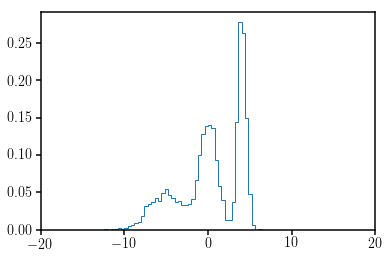

In [23]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(X, normed=True, histtype='step', bins=100, range=[-20, 20])
sub.set_xlim([-20., 20.])

In [24]:
X = np.reshape(X, (-1,1))
Xerr = np.reshape(Xerr, (-1,1,1))

In [25]:
xdgmm = XDGMM(3, n_iter=500)# long(1e9), tol=1e-6)
xdgmm.fit(X, Xerr)
print xdgmm.logL(X, Xerr)

/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecatio

-10054.8329631


In [26]:
print xdgmm.alpha, xdgmm.mu, xdgmm.V

[ 0.37270143  0.37485636  0.25244221] [[ 4.01369429]
 [ 0.03371778]
 [-4.9630554 ]] [[[ 0.24443541]]

 [[ 1.05976636]]

 [[ 4.29593226]]]


In [27]:
gmm = GMM(3, n_iter=10, covariance_type='full').fit(X)
w, m, c = gmm.weights_.copy(), gmm.means_.copy(), gmm.covars_.copy()
l = extreme_deconvolution(X, Xerr, w, m, c)
print l * X.shape[0]

/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecatio

-18733.6184715


In [28]:
print w, m, c

[ 0.3750622   0.37317587  0.25176193] [[ 0.03215707]
 [ 4.01229058]
 [-4.9796515 ]] [[[ 1.04224075]]

 [[ 0.24587413]]

 [[ 4.21822918]]]


In [29]:
print np.sum(gmm.score(X))

-19044.2983296


/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
